In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [294]:
df = pd.read_csv(r"C:\Users\agustin\Desktop\ventas.csv", sep = ',', engine = 'python')

In [295]:
df1 = df

In [296]:
df1.columns

Index(['# de venta', 'Fecha de venta', 'Estado', 'Descripción del estado',
       'Paquete de varios productos', 'Unidades',
       'Ingresos por productos (ARS)', 'Ingresos por envío (ARS)',
       'Cargo por venta e impuestos', 'Costos de envío',
       'Anulaciones y reembolsos (ARS)', 'Total (ARS)', 'Venta por publicidad',
       'SKU', '# de publicación', 'Canal de venta', 'Título de la publicación',
       'Variante', 'Precio unitario de venta de la publicación (ARS)',
       'Tipo de publicación', 'Factura adjunta',
       'Datos personales o de empresa', 'Tipo y número de documento',
       'Dirección', 'Condición fiscal', 'Comprador', 'DNI', 'Domicilio',
       'Ciudad', 'Estado.1', 'Código postal', 'País', 'Forma de entrega',
       'Fecha en camino', 'Fecha entregado', 'Transportista',
       'Número de seguimiento', 'URL de seguimiento', 'Forma de entrega.1',
       'Fecha en camino.1', 'Fecha entregado.1', 'Transportista.1',
       'Número de seguimiento.1', 'URL de seguim

In [297]:
df['Anulaciones y reembolsos (ARS)'].count()/len(df) #el 26% anula commpras

0.0656999112163362

In [298]:
df['Factura adjunta'].value_counts() # no trae info creo

Factura adjunta       42292
Factura no adjunta     1635
Name: Factura adjunta, dtype: int64

In [299]:
df['devolvio'] = np.where(df['Anulaciones y reembolsos (ARS)'].isnull() == True, 0, 1)

In [300]:
df.columns

Index(['# de venta', 'Fecha de venta', 'Estado', 'Descripción del estado',
       'Paquete de varios productos', 'Unidades',
       'Ingresos por productos (ARS)', 'Ingresos por envío (ARS)',
       'Cargo por venta e impuestos', 'Costos de envío',
       'Anulaciones y reembolsos (ARS)', 'Total (ARS)', 'Venta por publicidad',
       'SKU', '# de publicación', 'Canal de venta', 'Título de la publicación',
       'Variante', 'Precio unitario de venta de la publicación (ARS)',
       'Tipo de publicación', 'Factura adjunta',
       'Datos personales o de empresa', 'Tipo y número de documento',
       'Dirección', 'Condición fiscal', 'Comprador', 'DNI', 'Domicilio',
       'Ciudad', 'Estado.1', 'Código postal', 'País', 'Forma de entrega',
       'Fecha en camino', 'Fecha entregado', 'Transportista',
       'Número de seguimiento', 'URL de seguimiento', 'Forma de entrega.1',
       'Fecha en camino.1', 'Fecha entregado.1', 'Transportista.1',
       'Número de seguimiento.1', 'URL de seguim

In [301]:
df1['Canal de venta'].value_counts() # --> ver si hay algun canal que tenga mas devoluciones

Mercado Libre    43758
Mercado Shops      169
Name: Canal de venta, dtype: int64

In [302]:
df1['Paquete de varios productos'].value_counts() #contrastar vs devoluciones

No    41799
Sí     2128
Name: Paquete de varios productos, dtype: int64

In [303]:
df['Tipo y número de documento'].value_counts() #Compradores mas frecuentes

                    458
CUIT 23063005649     24
DNI 26821010         23
DNI 20316834         16
DNI 37067149         16
                   ... 
CUIT 30709769045      1
DNI 39719752          1
DNI 34856942          1
DNI 34749307          1
DNI 18486746          1
Name: Tipo y número de documento, Length: 38338, dtype: int64

In [304]:
df[['Tipo_doc','Numero_doc']] = df['Tipo y número de documento'].apply(lambda x: pd.Series(str(x).split(" ", 1))) 


In [305]:
(df['Numero_doc']== '').sum() #hay 458 que no tienen valor, estos van a ser transformados en 0

458

In [306]:
(df['Numero_doc']== '0').sum() #no hay DNI que sean 0

0

In [307]:
df["Numero_doc"].describe() 

count     43927
unique    38338
top            
freq        458
Name: Numero_doc, dtype: object

In [308]:
#transformacion a float
df["Numero_doc"] = [float(str(i).replace("", "0")) for i in df["Numero_doc"]]

In [309]:
df["N_DNI"] = np.where(df['Tipo_doc'] == 'DNI', df['Numero_doc'], 0)
df['N_CUIT'] = np.where(df['Tipo_doc'] == 'CUIT', df['Numero_doc'], 0)

In [310]:
#group by de los dni 

df.groupby('N_DNI')['devolvio'].sum().sort_values(ascending=False).head(10)

N_DNI
0.000000e+00    298
2.090004e+15      4
2.060102e+15      4
3.050308e+15      4
3.070601e+15      3
1.010404e+15      3
2.080700e+15      3
3.090302e+15      3
2.080703e+15      3
2.020100e+15      3
Name: devolvio, dtype: int32

In [311]:
#group by de los cuit

df.groupby('N_CUIT')['devolvio'].sum().sort_values(ascending=False).head(10)

N_CUIT
0.000000e+00    2652
2.000203e+21       4
2.000303e+21       2
2.000102e+21       2
2.000101e+21       2
3.030609e+21       2
3.000701e+21       2
3.000701e+21       2
2.000302e+21       2
3.000701e+21       2
Name: devolvio, dtype: int32

In [312]:
df['N_DNI'].describe()

count    4.392700e+04
mean     2.368738e+15
std      1.593307e+15
min      0.000000e+00
25%      2.000301e+15
50%      2.080100e+15
75%      3.040703e+15
max      9.090900e+15
Name: N_DNI, dtype: float64

In [313]:
df["mayor de 70"] = np.where(df['N_DNI'] < 10000000, 1, 0)
df['entre 50 y 70'] = np.where((df['N_DNI'] > 10000000) & (df['N_DNI'] < 20000000) , 1, 0)
df['entre 40 y 50'] = np.where((df['N_DNI'] > 20000000) & (df['N_DNI'] < 30000000) , 1, 0)
df['entre 25 y 40'] = np.where((df['N_DNI'] > 30000000) & (df['N_DNI'] < 40000000) ,1, 0)
df['entre 18 y 25'] = np.where((df['N_DNI'] > 40000000) & (df['N_DNI'] < 50000000) , 1, 0)
df['menor de 18'] = np.where((df['N_DNI'] > 50000000)  , 1, 0)

In [314]:
df['Forma de entrega'].value_counts()

Colecta de Mercado Envíos    24492
Mercado Envíos Flex          11737
Mercado Envíos Full           4799
                              2145
Acuerdo con el comprador       754
Name: Forma de entrega, dtype: int64

In [315]:
df['Mercado envios'] = np.where(df['Forma de entrega'] == 'Colecta de Mercado Envíos', 1, 0)
df['Mercado flex'] = np.where(df['Forma de entrega'] == 'Mercado Envíos Flex', 1, 0)
df['Mercado full'] = np.where(df['Forma de entrega'] == 'Mercado Envíos Full', 1, 0)
df['Acuerdo comprador'] = np.where(df['Forma de entrega'] == 'Acuerdo con el comprador', 1, 0)



In [316]:
df['Paquete de varios productos'].value_counts()

No    41799
Sí     2128
Name: Paquete de varios productos, dtype: int64

In [317]:
df['Paquete de varios productos'] = np.where(df['Paquete de varios productos'] == 'Sí', 1, 0)

In [318]:
df['Canal de venta'].value_counts()

Mercado Libre    43758
Mercado Shops      169
Name: Canal de venta, dtype: int64

In [319]:
df['Canal de venta'] = np.where(df['Canal de venta'] == 'Mercado Libre', 1, 0)

In [320]:
df['Venta por publicidad'].value_counts()

      43897
Sí       30
Name: Venta por publicidad, dtype: int64

In [321]:
df['Venta por publicidad'] = np.where(df['Venta por publicidad'] == 'Sí', 1, 0)

In [322]:
df['Tipo de publicación'].value_counts()

Clásica    28953
Premium    14891
              83
Name: Tipo de publicación, dtype: int64

In [323]:
df['publi clasica'] = np.where(df['Tipo de publicación'] == 'Clásica', 1, 0)
df['publi premium'] = np.where(df['Tipo de publicación'] == 'Premium', 1, 0)



In [324]:
df['Tipo_doc'].value_counts()

DNI     40203
CUIT     3266
          458
Name: Tipo_doc, dtype: int64

In [325]:
df['Dni'] = np.where(df['Tipo_doc'] == 'DNI', 1, 0)
df['Cuit'] = np.where(df['Tipo_doc'] == 'CUIT', 1, 0)



In [326]:
df['Reclamo cerrado'].value_counts()

df['Reclamo cerrado'] = np.where(df['Reclamo cerrado'] == 1, 1, 0) #aglomero el resto de las opciones en 0

In [327]:
df['Estado.1'].value_counts(10)

df['BA'] = np.where(df['Estado.1'] == 'Buenos Aires', 1, 0)
df['CABA'] = np.where(df['Estado.1'] == 'Capital Federal', 1, 0)
df['Cordoba'] = np.where(df['Estado.1'] == 'Córdoba', 1, 0)
df['Santa Fe'] = np.where(df['Estado.1'] == 'Santa Fe', 1, 0)


In [328]:
for i in range(len(df)):
    df['Fecha de venta'][i] = df['Fecha de venta'][i].replace('julio', 'July')
    df['Fecha de venta'][i] = df['Fecha de venta'][i].replace('agosto', 'August')
    df['Fecha de venta'][i] = df['Fecha de venta'][i].replace('septiembre', 'September')
    df['Fecha de venta'][i] = df['Fecha de venta'][i].replace('octubre', 'October')
    df['Fecha de venta'][i] = df['Fecha de venta'][i].replace('noviembre', 'November')
    df['Fecha de venta'][i] = df['Fecha de venta'][i].replace('diciembre', 'December')
    df['Fecha de venta'][i] = df['Fecha de venta'][i].replace('enero', 'January')
    df['Fecha de venta'][i] = df['Fecha de venta'][i].replace('febrero', 'February')
    df['Fecha de venta'][i] = df['Fecha de venta'][i].replace('marzo', 'March')
    df['Fecha de venta'][i] = df['Fecha de venta'][i].replace('abril', 'April')
    df['Fecha de venta'][i] = df['Fecha de venta'][i].replace('mayo', 'May')
    df['Fecha de venta'][i] = df['Fecha de venta'][i].replace('junio', 'June')

C:\Users\agustin\AppData\Local\Temp\ipykernel_16148\2712075114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecha de venta'][i] = df['Fecha de venta'][i].replace('julio', 'July')
C:\Users\agustin\AppData\Local\Temp\ipykernel_16148\2712075114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecha de venta'][i] = df['Fecha de venta'][i].replace('agosto', 'August')
C:\Users\agustin\AppData\Local\Temp\ipykernel_16148\2712075114.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [329]:
df['Fecha de venta']

0        15 de March de 2022 23:43 hs.
1        15 de March de 2022 23:15 hs.
2        15 de March de 2022 22:52 hs.
3        15 de March de 2022 22:21 hs.
4        15 de March de 2022 22:15 hs.
                     ...              
43922       1 de May de 2021 01:56 hs.
43923       1 de May de 2021 01:54 hs.
43924       1 de May de 2021 00:13 hs.
43925       1 de May de 2021 00:08 hs.
43926       1 de May de 2021 00:01 hs.
Name: Fecha de venta, Length: 43927, dtype: object

In [330]:
import datetime

from datetime import datetime

formato_fecha = "%d de %B de %Y %H:%M hs."
for i in range(len(df)):
    
    fecha_texto = df['Fecha de venta'][i]
    fecha = datetime.strptime(fecha_texto, formato_fecha)

    fecha_corta = fecha.strftime("%d-%m-%Y")
    df['Fecha de venta'][i] = fecha_corta



C:\Users\agustin\AppData\Local\Temp\ipykernel_16148\1292871742.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecha de venta'][i] = fecha_corta


In [331]:
df['diasem'] = np.nan
for i in range(len(df)):
    dia_semana = fecha.strftime("%A")
    df['diasem'][i] = dia_semana

C:\Users\agustin\AppData\Local\Temp\ipykernel_16148\233523928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diasem'][i] = dia_semana


In [ ]:
df['diasem'] = np.where(df['diasem'] == 'Monday', 1, 0)

In [332]:
df['diasem'].value_counts()

Saturday    43927
Name: diasem, dtype: int64

### Seleccion de variables

In [80]:
df = df[['Fecha de venta', 'Unidades', 'Costos de envío', 'Precio unitario de venta de la publicación (ARS)', 'BA', 'CABA', 'Cordoba', 'Santa Fe', 
'Reclamo cerrado', 'devolvio', 'Paquete de varios productos', 'Canal de venta', "Venta por publicidad", "N_DNI","N_CUIT", "mayor de 70", "entre 50 y 70",
 "entre 40 y 50", "entre 25 y 40", "entre 18 y 25", "menor de 18", 'Mercado envios', 'Mercado flex', 'Mercado full', 'Acuerdo comprador', 'publi clasica', 
 'publi premium', 'Dni', 'Cuit']]

In [81]:
df.dtypes

Fecha de venta                                       object
Unidades                                              int64
Costos de envío                                     float64
Precio unitario de venta de la publicación (ARS)    float64
Estado.1                                             object
Forma de entrega                                     object
Reclamo cerrado                                     float64
devolvio                                              int32
Paquete de varios productos                          object
Canal de venta                                       object
Venta por publicidad                                 object
Tipo de publicación                                  object
Tipo_doc                                             object
N_DNI                                               float64
N_CUIT                                              float64
mayor de 70                                           int32
entre 50 y 70                           

### Analisis exploratorio

In [29]:
print('Rango de fecha de las ventas')
print(df['Fecha de venta'][0])
print(df['Fecha de venta'][len(df)-1])

#tengo que tener en cuenta series de tiempo?


Rango de fecha de las ventas
15 de marzo de 2022 23:43 hs.
1 de mayo de 2021 00:01 hs.


<AxesSubplot: xlabel='devolvio', ylabel='count'>

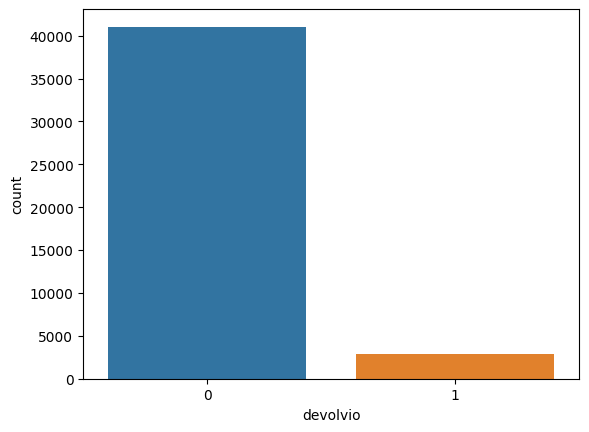

In [30]:
# Distribuucion de la varibale target, devolvio

sns.countplot(x = 'devolvio', data = df) #deberia balancear

<AxesSubplot: >

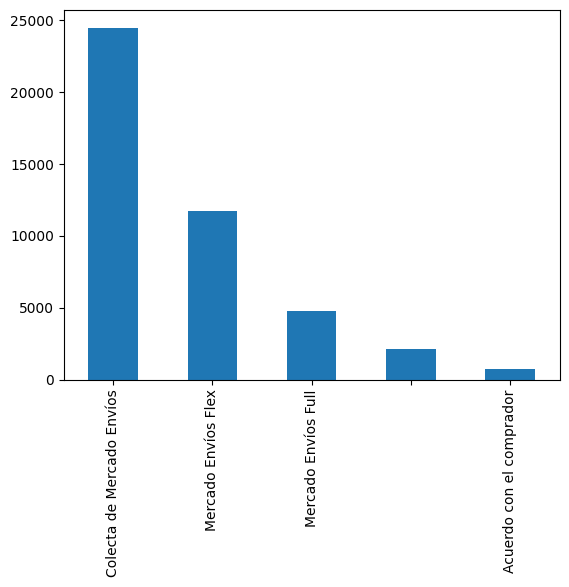

In [31]:
#grafico de barras de las fromas de entrega

df['Forma de entrega'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='Estado.1', ylabel='count'>

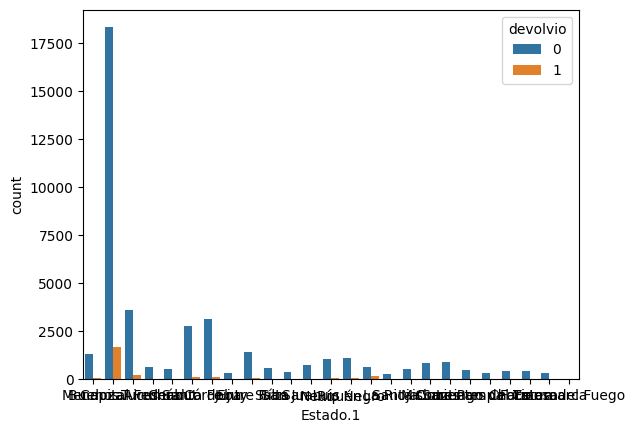

In [32]:
#df['Estado.1'].value_counts().plot(kind='bar')

# poner la columna devolvio como color en el grafico de barras de estado y agregarle el numero solapado



sns.countplot(x = 'Estado.1', hue = 'devolvio', data = df)


<AxesSubplot: >

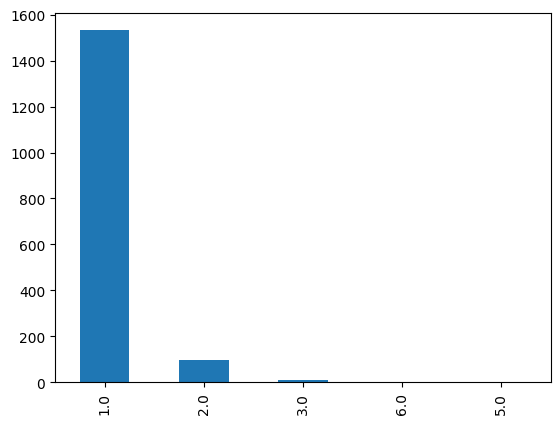

In [33]:
df['Reclamo cerrado'].value_counts().plot(kind='bar') #entender que significa los distintos valoress --> 1 es sin reclamo, 2, 3 , 4 , 5 son con reclamos CREO

<AxesSubplot: >

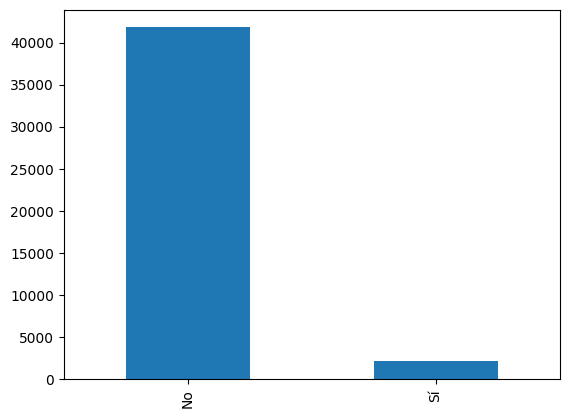

In [34]:
#paquete de varios productos

df['Paquete de varios productos'].value_counts().plot(kind='bar')

C:\Users\agustin\AppData\Local\Temp\ipykernel_16148\4156124885.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='spearman')


<AxesSubplot: >

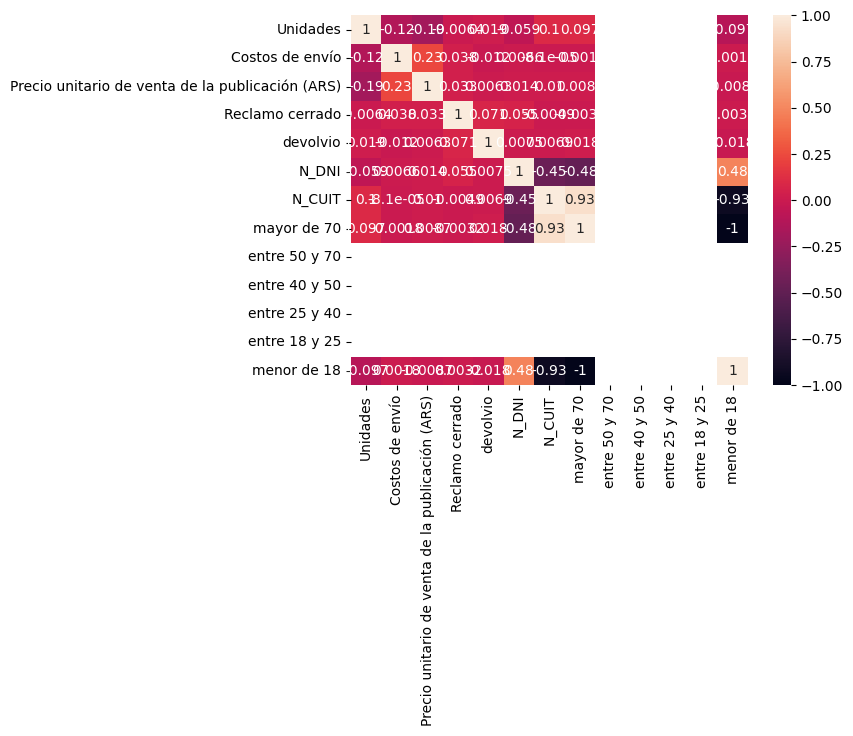

In [44]:
#grafico correlacion

corr = df.corr(method='spearman')
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

<AxesSubplot: >

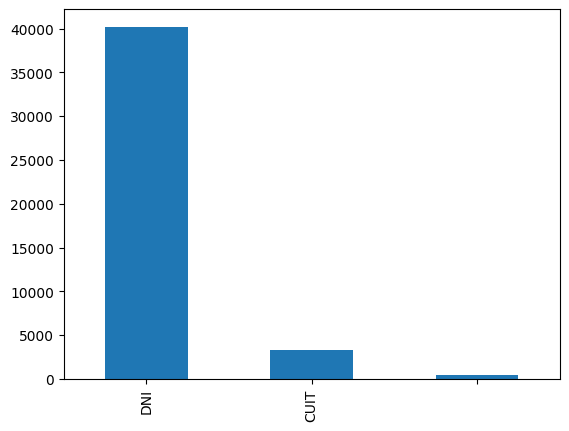

In [45]:
#grafico de barras de los tipos de documentos
df['Tipo_doc'].value_counts().plot(kind='bar')

C:\Users\agustin\AppData\Local\Temp\ipykernel_16148\34671659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['N_DNI'])


<AxesSubplot: xlabel='N_DNI', ylabel='Density'>

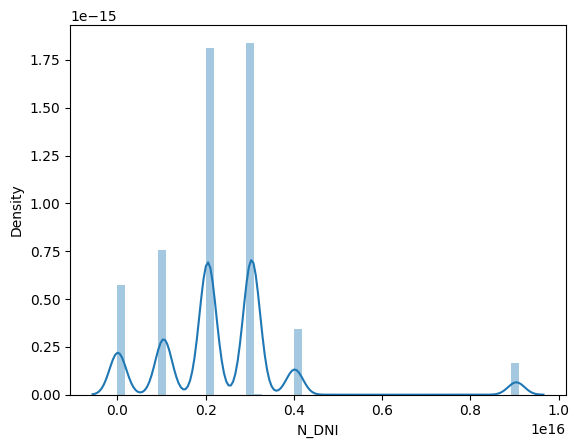

In [41]:
sns.distplot(df['N_DNI'])

<AxesSubplot: >

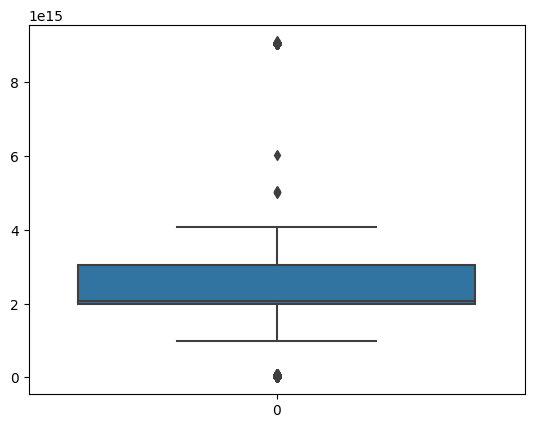

In [42]:
sns.boxplot(df['N_DNI']) #hay outliers

C:\Users\agustin\AppData\Local\Temp\ipykernel_16148\1002085568.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['N_CUIT'])


<AxesSubplot: xlabel='N_CUIT', ylabel='Density'>

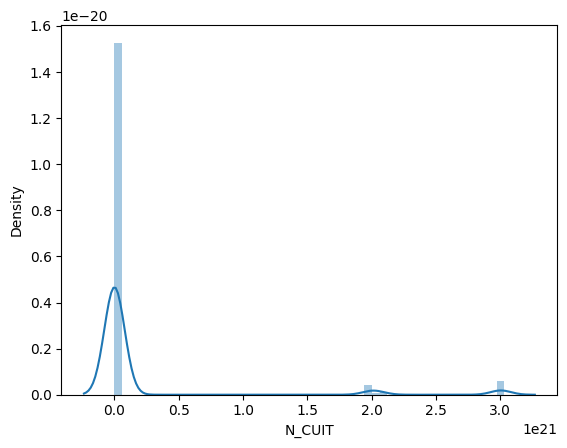

In [43]:
sns.distplot(df['N_CUIT'])

### Train - Test Split

In [37]:
from sklearn.model_selection import train_test_split

# para boosting

def train_test(df):
    X = df.drop(columns = ['devolvio'])
    y = df['devolvio']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(x_train.shape), print(y_train.shape)
    print(x_test.shape), print(y_test.shape)
    return x_train, x_test, y_train, y_test


In [38]:
x_train, x_test, y_train, y_test = train_test(df)

x_train1, x_test1, y_train1, y_test1 = train_test(df)

(35141, 20)
(35141,)
(8786, 20)
(8786,)
(35141, 20)
(35141,)
(8786, 20)
(8786,)


In [40]:
x_train.dtypes

Fecha de venta                                       object
Unidades                                              int64
Costos de envío                                     float64
Precio unitario de venta de la publicación (ARS)    float64
Estado.1                                             object
Forma de entrega                                     object
Reclamo cerrado                                     float64
Paquete de varios productos                          object
Canal de venta                                       object
Venta por publicidad                                 object
Tipo de publicación                                  object
Tipo_doc                                             object
N_DNI                                               float64
N_CUIT                                              float64
mayor de 70                                           int32
entre 50 y 70                                         int32
entre 40 y 50                           